<a href="https://colab.research.google.com/github/aalr007/MAAM/blob/main/EquipoXX_A1b_DL_TC5033_AD2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Luis Alfredo Negron Naldos A01793865
*   Javier Muñoz Barrios A01794423
*   Aurelio Antonio Lozano Rábago A01081266
* Luis José Navarrete Baduy A01793919






# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [ ]:
#Importamos las librerias necesarias para la ejecución del código
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Load the data, updating the path where the .csv files are. Keep in mind that we are reading dataframes

In [ ]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
DATA_PATH = 'C:/Users/44942/OneDrive - The Toro Company/Antonio/MNA/MAAM/Actividad1b/asl_data/asl_data/'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv')) #dataframe of train data
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv')) #dataframe of validation data

print header, it has 784 columns

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

convert from dataframe to num arrays

In [ ]:
#convert label dataframes into arrays
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
#delete label dataframes
del train_df['label']
del valid_df['label']
#convert X dataframes into arrays
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(27455, 784)
(27455,)


In [ ]:
print(x_val.shape)
print(y_val.shape)

(7172, 784)
(7172,)


In [ ]:
def split_val_test(x, y, pct=0.5, shuffle=True):

    #as shuffle is true, we will shuffle the data
    if shuffle:
        indices = np.arange(len(x))
        np.random.shuffle(indices)
        x = x[indices]
        y = y[indices]

    #Create a function that will allow you to split the previously loaded validation set
    #into valition and test.
    # get the size for validation and test data
    Xdata_size = int(x.shape[0] * pct)
    Ydata_size = int(y.shape[0] * pct)

    # split into validation and test arrays for X and Y. Validation gets the initial data, test the final
    x_val, x_test = x[:Xdata_size], x[Xdata_size:]
    y_val, y_test = y[:Ydata_size], y[Ydata_size:]

    return x_val, y_val, x_test, y_test
    pass

In [ ]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [ ]:
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(3586, 784)
(3586,)
(3586, 784)
(3586,)


In [ ]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

In [ ]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [ ]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [ ]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

### Graficar muestras

In [ ]:
def plot_number(image):
    plt.figure(figsize=(1,1))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

La imagen muestreada representa un: 6


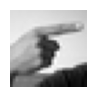

In [ ]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx, ]}')
plot_number(x_test[rnd_idx].reshape((28, 28)))

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

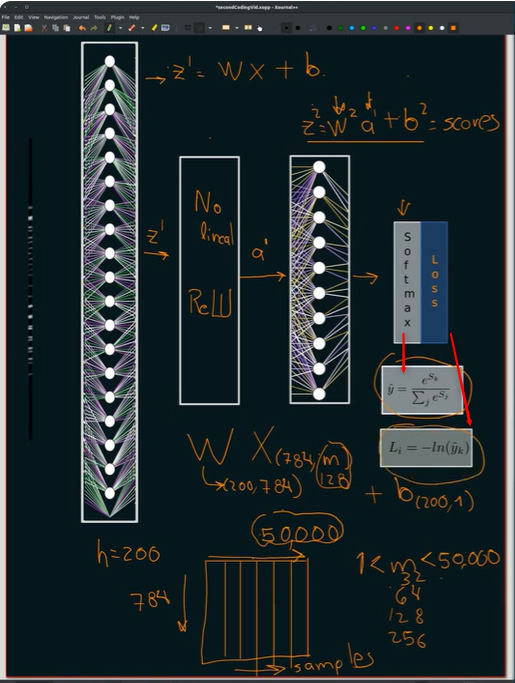

### Funciones adicionales

#### Mini batches

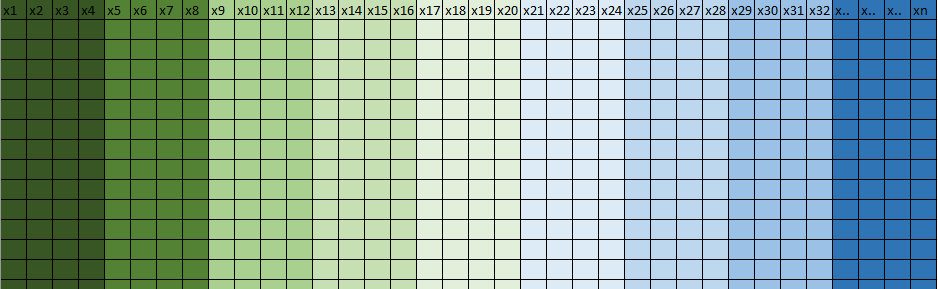


In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x #muestras (27455), 784
    y #muestras (27455), 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)        #this creates a list from 0 to total data (number of x images)
        np.random.shuffle(idxs)             #shuffle the data, random sampling
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))  #list comprehension build minibatches, from 0 to total data increasing in the size of the minibatch

Init parameters

In [ ]:
def init_parameters(input_size,neurons):
   '''
   input size elementos de entrada 784
   neurons lista[] con cantidad de neuronas de cada capa ejemplo [200,10]
   '''

   W1 = np.random.randn(neurons[0],input_size)*0.001  #definimos de manera aleatoria, numero de elementos de capa 1 por salida
   b1 = np.zeros((neurons[0],1))

   W2 = np.random.randn(neurons[1],neurons[0])
   b2 = np.random((neurons[1],1))

   return {'W1':W1,'b1':b1,'W2':W2,'b2':b2}


## Nuestra clase Linear, ReLU y Sequential

Create a class called np_tensor, which is a numpy tensor, it is the same than a np array but we are able to add methods

In [ ]:
class np_tensor(np.ndarray): pass
a = np.array([0, 0])
b = a.view(np_tensor)

###  Clase Linear

en la siguiente funcion creamos W * x + b

$$z^1 = W^1 X + b^1$$

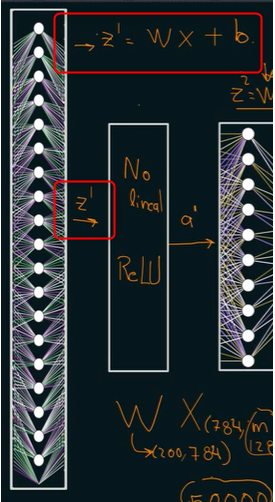

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He, ya no vamos a usar la inicilizacion de init_parameters
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # esta el forward de la clase lineal
        Z = self.W @ X + self.b  #aqui tenemos W X + b
        return Z
    def Lin_Relbackward(self, X, Z):
        X.grad = self.W.T @ Z.grad                  #sacamos el gradiente de X, son las derivadas parciales
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

en relu hacemos una funcion donde todo lo menor a 0 sea 0 y todo lo mayor a 0 tome el valor que tenga

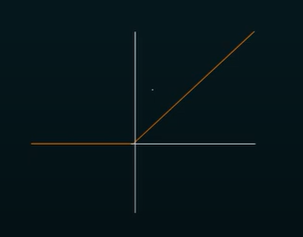

In [ ]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)  # 0 para todo lo menor a 0, activaciones negativas se hace 0 y lo positivo se deja pasar
    def Lin_Relbackward(self, Z, A):
        Z.grad = A.grad.copy()   #copiamos el gradiente de A (salida de una red neuronal)
        Z.grad[Z <= 0] = 0       #sobre la copia de A, hacemos 0 todos los gradientes que sean menores a 0

### Clase Sequential

We've created a class that will assemble the network architecture with the parameters we provide. Within the class code, we call the methods of 'Linear' and 'ReLU.' Additionally, this class includes the methods for regression and weight updates ('Update')

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def Seqbackward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].Lin_Relbackward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

In [ ]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

In the following function, we train the model. We use a 'for' loop where we call the model (which, as a reminder, is an instance of 'Sequential') with the created minibatches. We perform the forward propagation calculation, followed by backpropagation. Then, we update the weights and repeat the entire process for the next input. After calculating all the inputs in all the minibatches, we compute the cost and accuracy. We then move on to another minibatch and repeat the process.

In [ ]:
def train(model, epochs, mb_size, learning_rate ):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):   #minibatch creation
            scores = model(x.T.view(np_tensor))     #calculate the propagation
            _, cost = softmaxXEntropy(scores, y)    #calculate the cost of the propagation
            model.Seqbackward()                     #do the backpropagation
            model.update(learning_rate)
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

Function to calculate the precision of the model

In [ ]:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

### Create your model and train it

Our model will have the number of pixels as input, which is 784, then it will have 2 hiden layers of 200 neurons each, and a final output of 24, as it is the numbers of labels in the dataset. We are keeping the architecture of the hand written numbers as it did a great job clasiffying those numbers.

In [ ]:
model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 24)])
mb_size = 1024
learning_rate = 1e-4
epochs = 25


In [ ]:
train(model, epochs, mb_size, learning_rate)


costo: 1.0699055664625776, accuracy: 0.5554935861684328
costo: 0.5718473814314196, accuracy: 0.6569994422755159
costo: 0.3685227799295296, accuracy: 0.6776352481873954
costo: 0.20911770879527056, accuracy: 0.728388176240937
costo: 0.14995956068848865, accuracy: 0.7267150027886224
costo: 0.10267472384988463, accuracy: 0.7389849414389291
costo: 0.08597262692442216, accuracy: 0.7490239821528165
costo: 0.06404455632828891, accuracy: 0.7557166759620747
costo: 0.05535502572500756, accuracy: 0.7590630228667038
costo: 0.045447432414110187, accuracy: 0.7635248187395427
costo: 0.03989125052888511, accuracy: 0.7671500278862242
costo: 0.03323099383767053, accuracy: 0.7710540992749582
costo: 0.02921304645005644, accuracy: 0.7702175125488009
costo: 0.026650711366272364, accuracy: 0.7713329615170106
costo: 0.024633777933483984, accuracy: 0.7688232013385388
costo: 0.021552726317853505, accuracy: 0.7688232013385388
costo: 0.020180973339726908, accuracy: 0.7724484104852203
costo: 0.018320245425293116, a

In [ ]:
print(accuracy(x_test, y_test, mb_size))

0.7802565532626883


### Test your model on Random data from your test set

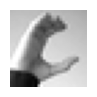

el valor predicho es: c el valor real es:c


In [ ]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')